###  print out structures

In [1]:
import random
import numpy as np
from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot

np.random.seed(1337)
random.seed(1337)

#### Multi Layer Perceptron 1-2-1

[Value(name=val1,neuronnumber=n1,weightnumber=,type=w1,data=0.5, grad=0), Value(name=val2,neuronnumber=n1,weightnumber=,type=b,data=0, grad=0), Value(name=val3,neuronnumber=n2,weightnumber=,type=w1,data=0.5, grad=0), Value(name=val4,neuronnumber=n2,weightnumber=,type=b,data=0, grad=0), Value(name=val5,neuronnumber=n1,weightnumber=,type=w1,data=0.6000000000000001, grad=0), Value(name=val6,neuronnumber=n1,weightnumber=,type=w2,data=1.2000000000000002, grad=0), Value(name=val7,neuronnumber=n1,weightnumber=,type=b,data=0, grad=0)]
inputs  [Value(name=val8,neuronnumber=,weightnumber=,type=i,data=7, grad=0), Value(name=val9,neuronnumber=,weightnumber=,type=i,data=8, grad=0)]
number of Value objects created =  19


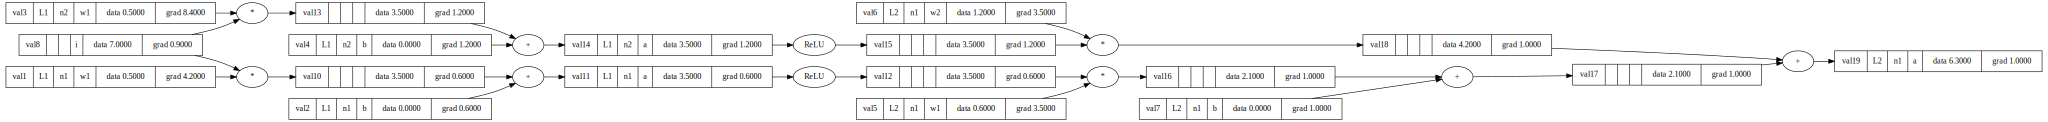

In [2]:
# initialize a model
nin = 1  # number of inputs
nout = 1  # number of outputs
Value.value_counter = 0

# model = MLP_linear(nin, [2,  nout]) # 1-layer neural network
model = MLP(nin, [2, nout], lastReLU=True, randomweights=False)  # 1-layer neural network
print(model.parameters())

xinumbers = list(range(7, 7+nin + 1))
xinput = [Value(x, type="i") for x in xinumbers]
print("inputs ", xinput)

activation = model(xinput)
activation.backward()

print("number of Value objects created = ", Value.value_counter)

draw_dot(activation, debug_print_01=False)

#### Multi Layer Perceptron 1-2-2

inputs  [Value(name=val11,neuronnumber=,weightnumber=,type=i,data=1, grad=0)]
[Value(name=val21,neuronnumber=n1,weightnumber=,type=a,data=0.65, grad=0), Value(name=val25,neuronnumber=n2,weightnumber=,type=a,data=0.7800000000000001, grad=0)]
number of Value objects created =  39


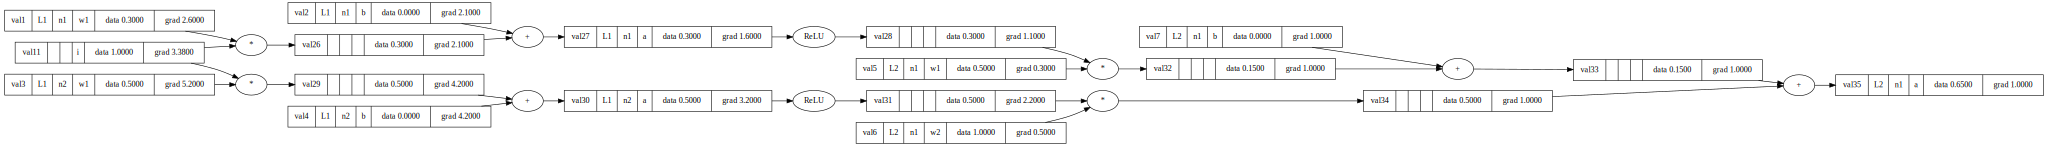

In [3]:
# initialize a model
nin = 1  # number of inputs
nout = 2  # number of outputs
Value.value_counter = 0

model = MLP(nin, [2, nout], lastReLU=True)  # 1-layer neural network
xinumbers = list(range(1, nin + 1))
xinput = [Value(x, type="i") for x in xinumbers]
print("inputs ", xinput)

print(model(xinput))

activation = []
activation = model(xinput)
activation[0].backward()
activation[1].backward()

print("number of Value objects created = ", Value.value_counter)

draw_dot(activation[0], debug_print_01=False)

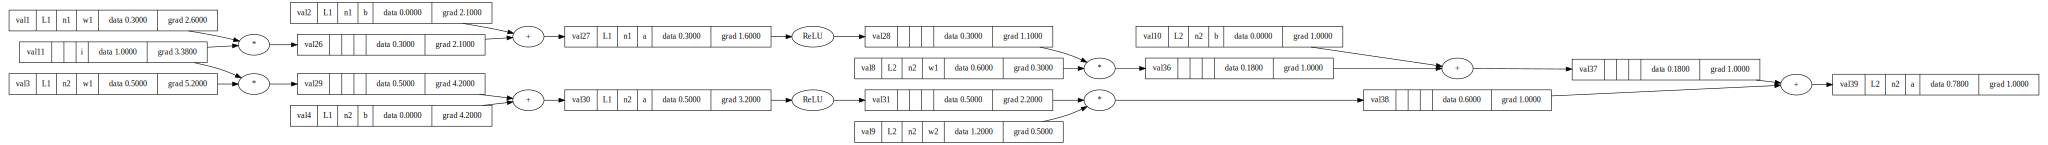

In [4]:
draw_dot(activation[1], debug_print_01=False)

#### Multi Layer Perceptron 3-4-4-1

In [5]:
# loss function single MLP
def loss_single(target, output):
    total_loss = (output - target)*(output - target)
    total_loss.type="l"
    return total_loss

inputs  [Value(name=val42,neuronnumber=,weightnumber=,type=i,data=1, grad=0), Value(name=val43,neuronnumber=,weightnumber=,type=i,data=2, grad=0), Value(name=val44,neuronnumber=,weightnumber=,type=i,data=3, grad=0)]
loss=  Value(name=val116,neuronnumber=,weightnumber=,type=l,data=2941.977600000001, grad=1)
number of Value objects created =  116


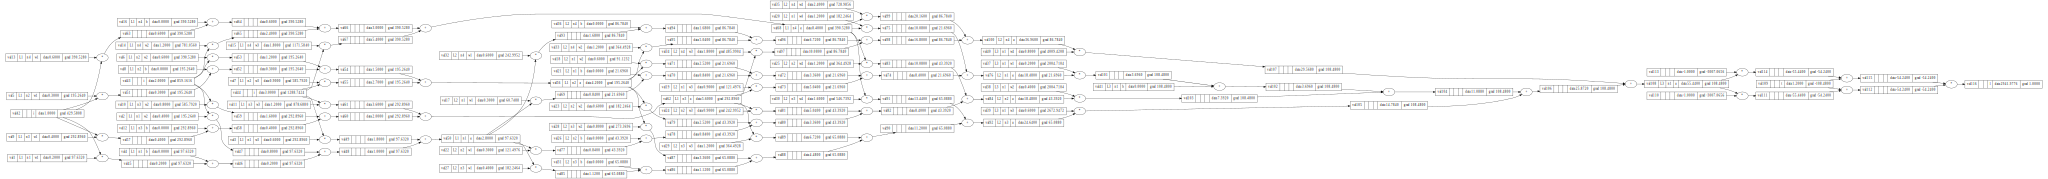

In [6]:
# initialize a model
nin = 3  # number of inputs
nout = 1  # number of outputs
Value.value_counter = 0

model = MLP(nin, [4, 4, nout], lastReLU=False)  # 2-layer neural network
xinumbers = list(range(1, nin + 1))
xinput = [Value(x, type="i") for x in xinumbers]
print("inputs ", xinput)

activation = model(xinput)

# ys = [[1.0]]
xtarget = Value(1.2, type="t")  # desired targets

loss = loss_single(activation, xtarget)
loss.backward()
print("loss= ", loss)
print("number of Value objects created = ", Value.value_counter)

draw_dot(loss, debug_print_01=False)

#### 4 times Multi Layer Perceptron 3-4-4-1

In [7]:
# loss function multiple MLP's
def loss_mult(targets, outputs):
    total_loss = sum((yout - ygt) ** 2 for ygt, yout in zip(outputs, targets))
    return total_loss

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
inputs  [[Value(name=val42,neuronnumber=,weightnumber=,type=i,data=1, grad=0), Value(name=val43,neuronnumber=,weightnumber=,type=i,data=2, grad=0), Value(name=val44,neuronnumber=,weightnumber=,type=i,data=3, grad=0), Value(name=val45,neuronnumber=,weightnumber=,type=i,data=4, grad=0)], [Value(name=val46,neuronnumber=,weightnumber=,type=i,data=5, grad=0), Value(name=val47,neuronnumber=,weightnumber=,type=i,data=6, grad=0), Value(name=val48,neuronnumber=,weightnumber=,type=i,data=7, grad=0), Value(name=val49,neuronnumber=,weightnumber=,type=i,data=8, grad=0)], [Value(name=val50,neuronnumber=,weightnumber=,type=i,data=9, grad=0), Value(name=val51,neuronnumber=,weightnumber=,type=i,data=10, grad=0), Value(name=val52,neuronnumber=,weightnumber=,type=i,data=11, grad=0), Value(name=val53,neuronnumber=,weightnumber=,type=i,data=12, grad=0)]]
input 0  [Value(name=val42,neuronnumber=,weightnumber=,type=i,data=1, grad=0), Value(name=val43,neuronnumber

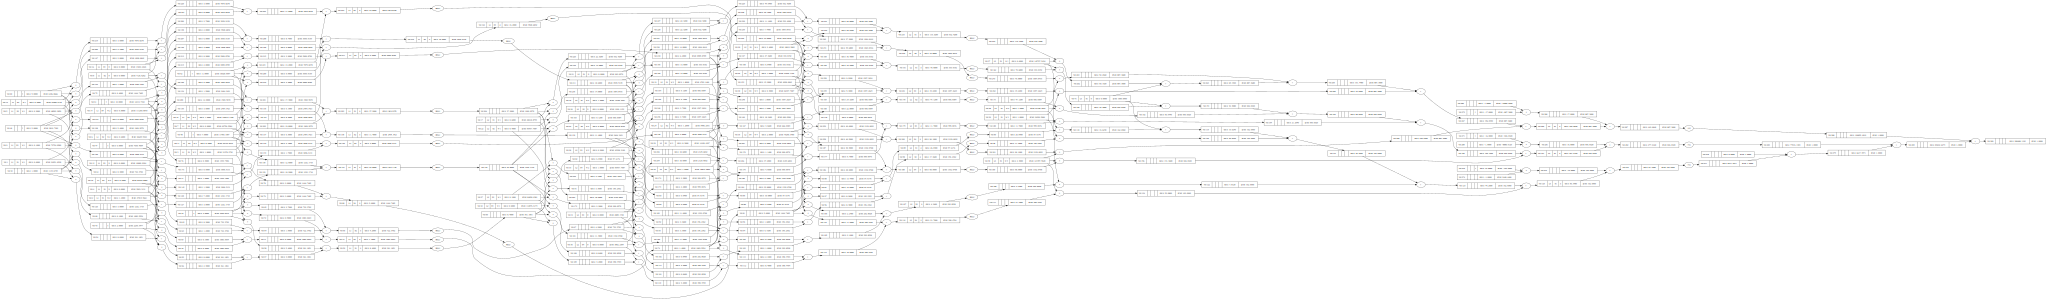

In [8]:
# initialize a model
nin = 3  # number of inputs
nout = 1  # number of outputs

Value.value_counter = 0

model = MLP(nin, [4, 4, nout], lastReLU=True)  # 2-layer neural network
xinumbers1 = np.array(list(range(1, nin * 4 + 1)))
xinumbers = xinumbers1.reshape(nin, 4)
print(xinumbers)

xinput = [[Value(3) for x in range(4)] for y in range(3)]

for i in range(len(xinumbers)):
    for j in range(len(xinumbers[i])):
        xinput[i][j].type = "i"
        xinput[i][j].data = xinumbers[i][j]

print("inputs ", xinput)
print("input 0 ", xinput[0])

activation = [model(x) for x in xinput]

ys = [15.0, -16.0, -17.0, 18.0]  # desired targets
xtarget = [Value(x, type="t") for x in ys]
print("xtarget= ", xtarget)
loss = loss_mult(activation, xtarget)
print("loss= ", loss)
print("number of Value objects created = ", Value.value_counter)
loss.backward()

draw_dot(loss)